<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/lab2_decision_tree_using_data_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ต้นไม้การตัดสินใจ (Decision Tree)

เป็น Supervised Learning Algorithm: ที่สามารถใช้กับปัญหาได้ 2 ประเภท คือ
1.   สามารถใช้เพื่อการจำแนกข้อมูล (Classification) ของข้อมูลที่ไม่ต่อเนื่อง (Discrete)
2.   สามารถใช้เพื่อการวิเคราะห์การถดถอย (Regression) ของข้อมูลที่มีความต่อเนื่อง (Continuous)

เป็น Algorithm ที่สามารถอธิบายการตัดสินใจ ได้ง่ายผ่านการตัดสินใจคล้ายคำสั่ง IF...ELSE... ที่สร้างขึ้นมาจากข้อมูลโดยอัตโนมัติ

## ต้นไม้การตัดสินใจ (Decision Tree):

1. การทำความรู้จักกับข้อมูล (Data Understanding)
2. การแปลงข้อมูล (Data Encoding) <br/>
   2.1 นำเข้า Library ที่จำเป็นในการจัดเตรียมข้อมูล: sklearn.preprocessing<br/>
   2.2 สร้างตัวแปรที่จะทำหน้าที่เข้ารหัส (label_encoder) จาก sklearn.preprocessing <br/>
   2.3 ทำการแปลงคอลัมน์เพศ (sex) ด้วยวิธีการ Label Encoding <br/>
   2.4 ทำการแปลงคอลัมน์รองเท้าที่เป็นเป้าหมาย (target) ด้วยวิธีการ Label Encoding <br/>
3. แปลงข้อมูลจาก Pandas DataFrame เป็น อาร์เรย์ (Array) ด้วย Numpy
4. ทำการสร้างแบบจำลอง (Model) ต้นไม้การตัดสินใจ (Decision Tree)
5. แสดงภาพ (Data Visualization) ของการตัดสินใจภายใน Decision Tree
6. แสดงภาพ (Data Visualization) ของการตัดสินใจภายใน Decision Tree (ในรูปแบบข้อความ)
7. การบันทึกแบบจำลอง (Save Model) และการเรียนใช้งานแบบจำลองที่บันทึกไว้ (Load Model) มาใช้งาน


### Step 1: การทำความรู้จักกับข้อมูล (Data Understanding)

1.1 ข้อมูลที่จะใช้ในการทำงานของ Machine Learning เช่น เพศ (sex), อายุ (age) และ รองเท้าที่เป็นเป้าหมาย (target)<br/>
1.2 ตรวจสอบรูปร่างของข้อมูลที่จัดเก็บใน Pandas ว่าจัดเก็บในรูปแบบกี่มิติ (1D, 2D, 3D, ...) ด้วยคุณสมบัติ .shape<br/>

#### Step 1.1: ข้อมูลที่จะใช้ในการทำงานของ Machine Learning เช่น เพศ (sex), อายุ (age) และ รองเท้าที่เป็นเป้าหมาย (target)

In [1]:
import pandas as pd

data = pd.DataFrame({
    'sex': ['male', 'female', 'male', 'male', 'female', 'male', 'female'],
    'age': [30, 17, 25, 18, 19, 35, 30],
    'target': ['oxfords', 'sneakers', 'oxfords', 'sneakers','sneakers', 'oxfords','high-heels']
})

data

,sex,age,target
0,male,30,oxfords
1,female,17,sneakers
2,male,25,oxfords
3,male,18,sneakers
4,female,19,sneakers
5,male,35,oxfords
6,female,30,high-heels


#### Step 1.2: ตรวจสอบรูปร่างของข้อมูลที่จัดเก็บใน Pandas ว่าจัดเก็บในรูปแบบกี่มิติ (1D, 2D, 3D, ...) ด้วยคุณสมบัติ .shape

In [2]:
data.shape

(7, 3)

### Step 2: การแปลงข้อมูล (Data Encoding)

การเลือก Encoding ให้เหมาะสมกับ Algorithms เป็นเรื่องที่สำคัญ เนื่องจาก**ถ้าข้อมูลเข้าไม่ดี (Garbage In)** **ผลลัพธ์ที่ได้ก็จะไม่ดี (Garbage Out)**

**ข้อมูลเข้า (Input / Features)**: คือ ข้อมูลที่ใช้ในการตัดสินใจ ประกอบด้วย เพศ (sex) และ อายุ (age) โดยมี **เพศ (sex) เป็นข้อมูลที่ไม่ใช่ตัวเลข (Categorial)**

**ข้อมูลผลเฉลย (Output / Target / Label)**: คือ รองเท้าที่เป็นเป้าหมาย (target) และ**รองเท้าเป็นข้อมูลที่ไม่ใช่ตัวเลข (Categorial)**

**คำถาม :** ในตัวอย่างนี้เราควรใช้เทคนิดการเข้ารหัสข้อมูลที่ไม่ใช่ตัวเลข ด้วยวิธีใด? ระหว่าง One-Hot กับ Label Encoding

**คำตอบ :**
1. **สำหรับ เพศ (sex)** ที่เป็นข้อมูลเข้า มีเพียง 2 ทางเลือก คือ ชาย (male) หรือ (female) สอดคล้องกับหลักการตัดสินใจของ Decision Tree จะคล้ายกับ IF...ELSE... ก็คือ จริง (True) กับ เท็จ (False) เราเลยสามารถเลือก Label Encoding มาเข้ารหัสให้กับเพศ (sex) ได้ ... <br/>(**หมายเหตุ:** แต่ถ้าจะใช้ One-Hot Encoding ก็สามารถทำได้)
2. **สำหรับ รองเท้าที่เป็นเป้าหมาย (target)** ที่เป็นผลเฉลย (Output) ก็ใช้ Label Encoding เนื่องจาก ผลเฉลย มีชื่อเรียกอื่น เช่น Target / Label

In [3]:
from sklearn import preprocessing                       # นำเข้า Library ที่จำเป็นในการจัดเตรียมข้อมูล: sklearn.preprocessing

label_encoder = preprocessing.LabelEncoder()           # สร้างตัวแปรที่จะทำหน้าที่เข้ารหัส (label_encoder) จาก sklearn.preprocessing
data['sex'] = label_encoder.fit_transform(data['sex'])             # ทำการแปลงคอลัมน์เพศ (sex) ด้วยวิธีการ Label Encoding

data

,sex,age,target
0,1,30,oxfords
1,0,17,sneakers
2,1,25,oxfords
3,1,18,sneakers
4,0,19,sneakers
5,1,35,oxfords
6,0,30,high-heels


In [4]:
data['target'] = label_encoder.fit_transform(data['target'])  # ทำการแปลงคอลัมน์รองเท้าที่เป็นเป้าหมาย (target) ด้วยวิธีการ Label Encoding

data

,sex,age,target
0,1,30,1
1,0,17,2
2,1,25,1
3,1,18,2
4,0,19,2
5,1,35,1
6,0,30,0


### Step 3: แปลงข้อมูลจาก Pandas DataFrame เป็น อาร์เรย์ (Array) ด้วย Numpy

In [5]:
import numpy as np              # นำเข้า Library ในการสร้าง อาร์เรย์ (Array)

feature_names = ['sex', 'age']  # เลือกคอลัมน์ที่จะใช้เป็นข้อมูลเข้า (Input/Features) ให้กับแบบจำลอง (Model)
target_name = 'target'          # เลือกคอลัมน์ที่จะใช้เป็นข้อมูลผลเฉลย (Output/Target/Label) ให้กับแบบจำลอง (Model)

features = np.array(data[feature_names])          # จัดเก็บข้อมูลเข้า (Input/Features)
target = np.array(data[target_name])            # จัดเก็บข้อมูลผลเฉลย (Output/Target/Label)

# หมายเหตุ:
# ในทางปฏิบัติ การเลือกคอลัมน์ที่จะใช้เป็นข้อมูลเข้า (Input/Features) ให้กับแบบจำลอง (Model) จะมีวิธีการคำนวณว่าคอลัมน์ใดมีความสำคัญ (Important Feature) เรียกว่า "Feature Selection"
# https://medium.com/kbtg-life/feature-selection-techniques-in-machine-learning-2300f278c3d4

In [6]:
features  # แสดงข้อมูลเข้า (Input/Features)

array([[ 1, 30],
       [ 0, 17],
       [ 1, 25],
       [ 1, 18],
       [ 0, 19],
       [ 1, 35],
       [ 0, 30]])

In [7]:
target # แสดงข้อมูลผลเฉลย (Output/Target/Label)

array([1, 2, 1, 2, 2, 1, 0])

### Step 4: ทำการสร้างแบบจำลอง (Model) ต้นไม้การตัดสินใจ (Decision Tree)

In [8]:
from sklearn.tree import DecisionTreeClassifier   # Library ต้นไม้การตัดสินใจสำหรับการจำแนก (Classification)

model = DecisionTreeClassifier()  # สร้างแบบจำลอง (Model)
model.fit(features, target)       # ส่งข้อมูลเข้า (Input/Feature),  ข้อมูลผลเฉลย (Output/Target/Label) เข้าไปเรียนรู้ในแบบจำลอง
model.score(features, target)     # ทดสอบ (Test) แบบจำลอง (Model) ด้วยการคำนวณคะแนนความถูกต้อง (Accuracy)

# หมายเหตุ:
#1. สาเหตุที่ model.score มีค่าความถูกต้อง (Accuracy) = 1 เนื่องจาก เราทำการทดสอบ(Test) แบบจำลอง(Model) โดยใช้ข้อมูลที่เราสอน(Train) เหมือนโกงข้อสอบ เพราะแบบจำลองเคยเห็นคำตอบ(ผลเฉลย) มาก่อนแล้ว
#2. ในความเป็นจริง ถ้าเรามีปริมาณข้อมูลมากพอ เราควรแบ่งข้อมูลเป็น 2 ส่วน คือ ข้อมูลสำหรับเรียนรู้ (Train) และข้อมูลสำหรับการทดสอบ (Test) -> train_test_split(...)


1.0

### Step 5: แสดงภาพ (Data Visualization) ของการตัดสินใจภายใน Decision Tree

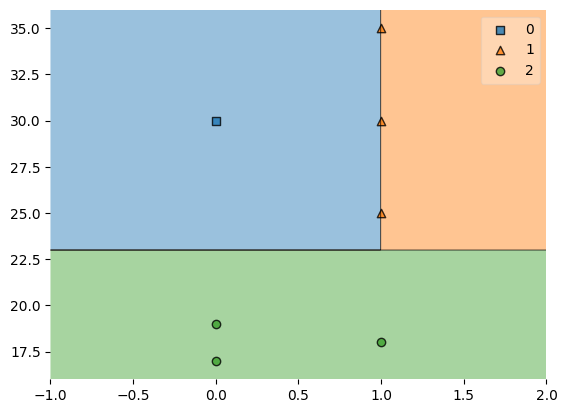

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plot_decision_regions(X=features, y=target, clf=model)

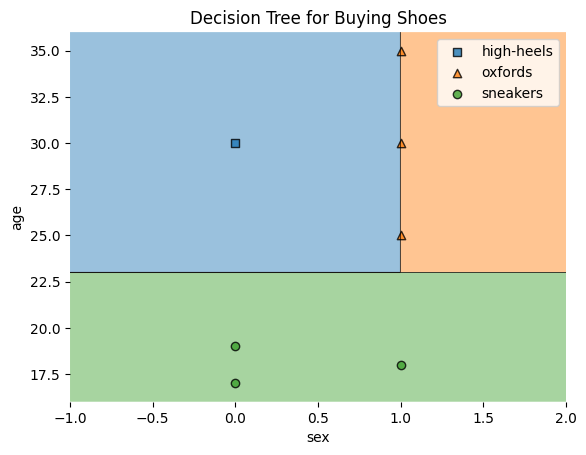

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=features, y=target, clf=model)

plt.xlabel('sex')
plt.ylabel('age')
plt.title('Decision Tree for Buying Shoes')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['high-heels', 'oxfords', 'sneakers']) # label_encoder.classes_

plt.show()


In [11]:
label_encoder.classes_

array(['high-heels', 'oxfords', 'sneakers'], dtype=object)

[Text(0.4, 0.8333333333333334, 'x[1] <= 22.0\ngini = 0.612\nsamples = 7\nvalue = [1, 3, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

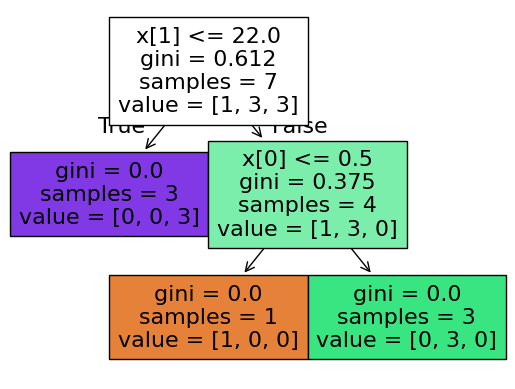

In [12]:
from sklearn import tree

tree.plot_tree(model, filled=True)            # แสดง Data Visualization ของ Tree

[Text(0.4, 0.8333333333333334, 'x[1] <= 22.0\ngini = 0.612\nsamples = 7\nvalue = [1, 3, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

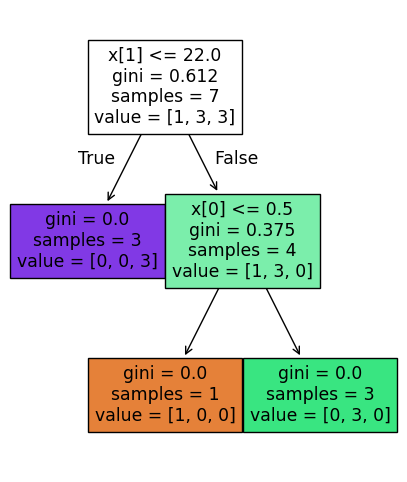

In [13]:
plt.figure(figsize=(5,6))     # กำหนดขนาดของภาพที่แสดง (5, 6)

tree.plot_tree(model, filled=True)  # แสดง Data Visualization ของ Tree

[Text(0.4, 0.8333333333333334, 'age <= 22.0\ngini = 0.612\nsamples = 7\nvalue = [1, 3, 3]\nclass = oxfords'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = sneakers'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'sex <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = oxfords'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = high-heels'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = oxfords')]

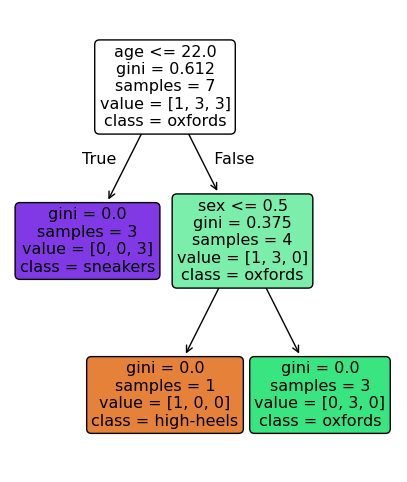

In [20]:
plt.figure(figsize=(5,6))

tree.plot_tree(model, filled=True, feature_names=feature_names, class_names=label_encoder.classes_, rounded=True)

### Step 6: แสดงภาพ (Data Visualization) ของการตัดสินใจภายใน Decision Tree (ในรูปแบบข้อความ)

In [15]:
tree_result = tree.export_text(model)

print(tree_result)

|--- feature_1 <= 22.00
|   |--- class: 2
|--- feature_1 >  22.00
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1



In [21]:
tree_result = tree.export_text(model, feature_names=feature_names, class_names=label_encoder.classes_)

print(tree_result)

|--- age <= 22.00
|   |--- class: sneakers
|--- age >  22.00
|   |--- sex <= 0.50
|   |   |--- class: high-heels
|   |--- sex >  0.50
|   |   |--- class: oxfords



In [17]:
label_encoder.classes_

array(['high-heels', 'oxfords', 'sneakers'], dtype=object)

### Step 7: การบันทึกแบบจำลอง (Save Model) และการเรียนใช้งานแบบจำลองที่บันทึกไว้ (Load Model) มาใช้งาน

In [18]:
import pickle

file_name = 'shoes_model.md'
pickle.dump(model, open(file_name, 'wb'))

In [19]:
load_model = pickle.load(open(file_name, 'rb'))
result = load_model.score(features, target)

print(result)

1.0


## การประยุกต์ใช้ Decision Tree กับ ข้อมูลการหาความสัมพันธ์ของผู้รอดชีวิต (Survivor) จากเรือ Titanic

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation

In [22]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [23]:
type(titanic)

pandas.core.frame.DataFrame

In [24]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
